In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

max_ = 100

In [2]:
df_1=pd.read_csv("Womens_Clothing_E_Commerce_Reviews.csv",index_col=False)
column=['Clothing ID','Age','Title','Review Text','Rating','Recommended IND'
                ,'Positive Feedback Count','Division Name','Department Name','Class Name']

In [3]:
df=pd.DataFrame(data=df_1,columns=column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [4]:
df.head(3)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


In [5]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


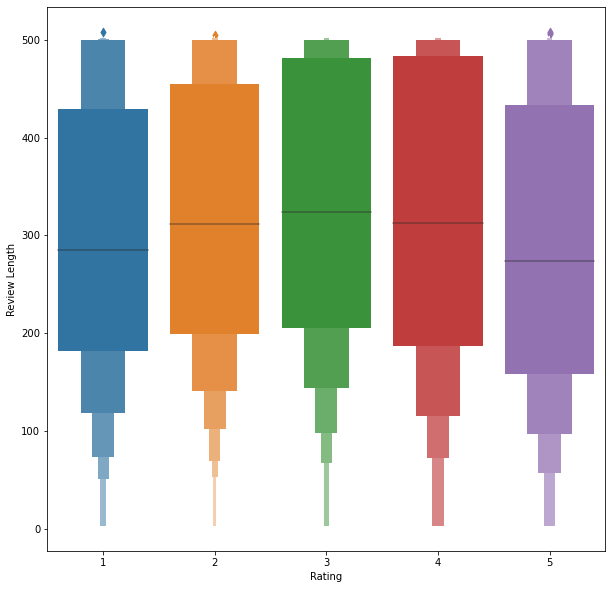

In [6]:
df['Review Text']=df['Review Text'].astype(str)
df['Review Length']=df['Review Text'].apply(len)

#to find the correlation between review length and rating

plt.figure(figsize=(10,10))
sns.boxenplot(x='Rating', y='Review Length', data=df)

#review length tends to increase as the rating increases and rating 3,4 has more Length compare to others

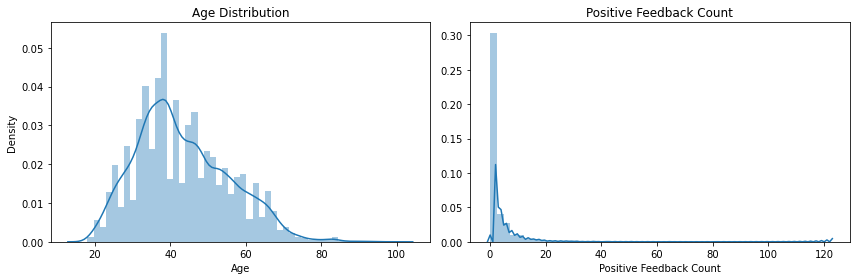

In [7]:
f, ax = plt.subplots(1,2,figsize=(12,4), sharey=False)
sns.distplot(df.Age, ax=ax[0])
ax[0].set_title("Age Distribution")
ax[0].set_ylabel("Density")

sns.distplot(df["Positive Feedback Count"], ax=ax[1])
ax[1].set_title("Positive Feedback Count")

plt.tight_layout()
plt.show()

***Age group within 30-50 are more prominant in Positive review***

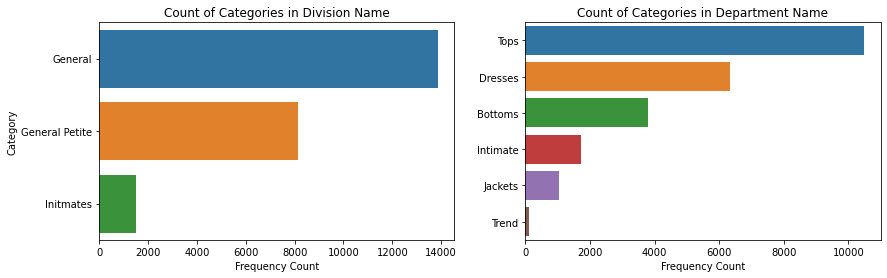

In [8]:
row_plots = ["Division Name","Department Name"]
f, axes = plt.subplots(1,len(row_plots), figsize=(14,4), sharex=False)

for i,x in enumerate(row_plots):
    sns.countplot(y=x, data=df,order=df[x].value_counts().index, ax=axes[i])
    axes[i].set_title("Count of Categories in {}".format(x))
    axes[i].set_xlabel("")
    axes[i].set_xlabel("Frequency Count")

axes[0].set_ylabel("Category")
axes[1].set_ylabel("")

plt.show()

* Division Name vs Department Name

In [9]:
#data cleaning

from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words

import nltk

from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

import re

a = df['Review Text'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers -> list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))

stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)

filtered_sentence = []
filtered_sentence = [w for w in word_tokens if not w in stop_words]

# remove words with length less than 2
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(max_),
                    columns=['Word', 'Frequency'])

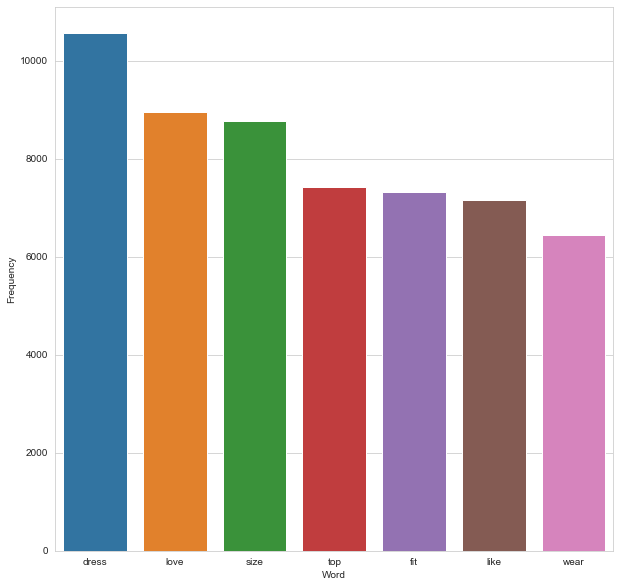

In [10]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

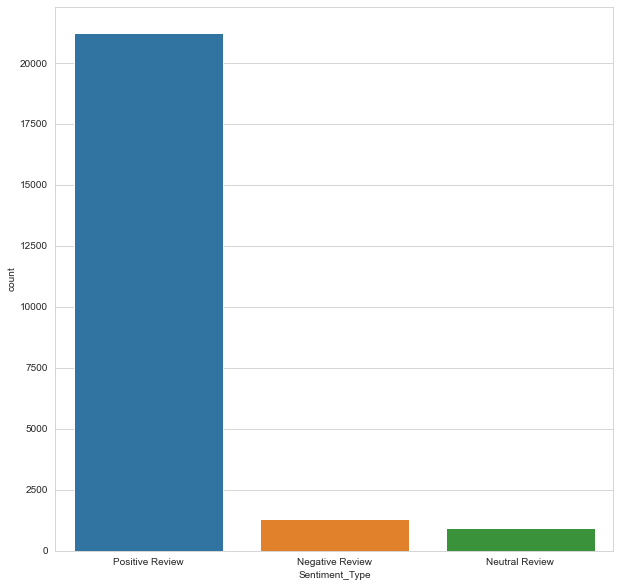

In [11]:
## for Sentiment thing...
# Takes loads of time

from textblob import TextBlob

bloblist_desc = list()

df_review_str=df['Review Text'].astype(str)

for row in df_review_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['Review','sentiment','polarity'])
 
def function_for_sentiment_analysis(df_polarity_desc):
    if df_polarity_desc['sentiment'] > 0:
        val = "Positive Review"
    elif df_polarity_desc['sentiment'] == 0:
        val = "Neutral Review"
    else:
        val = "Negative Review"
    return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(function_for_sentiment_analysis, axis=1)

plt.figure(figsize=(10,10))

ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)


In [12]:
positive_r=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Positive Review']
negative_r=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Negative Review']

# positive Review

(-0.5, 399.5, 199.5, -0.5)

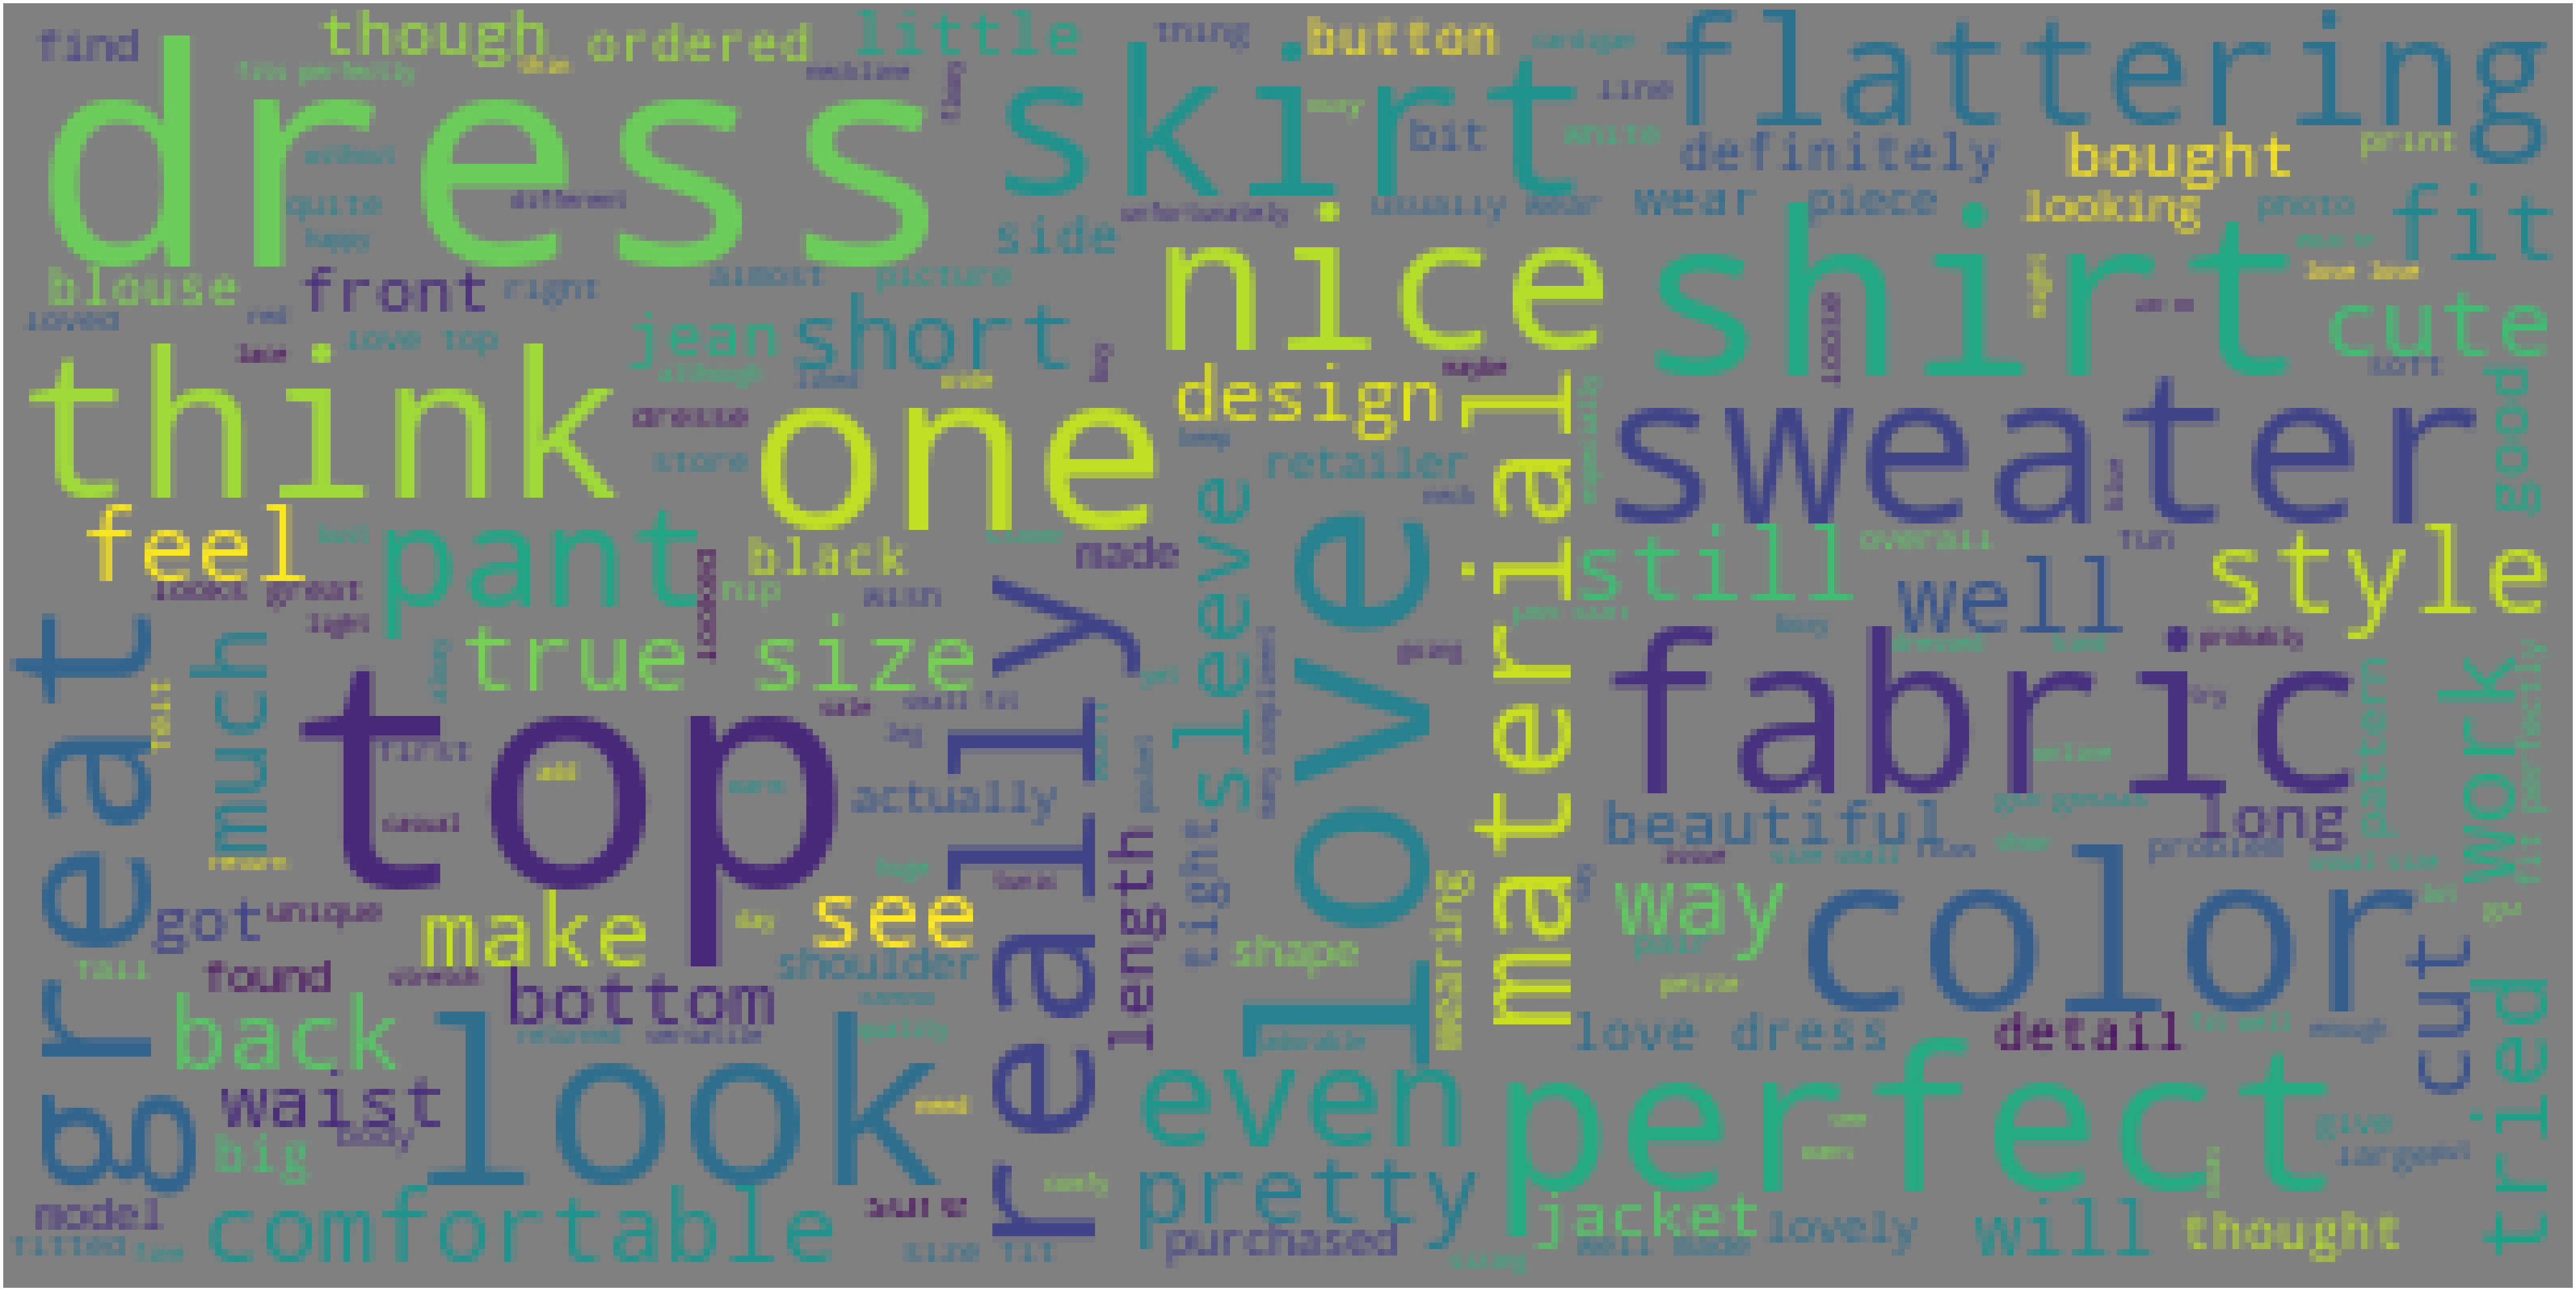

In [13]:
plt.figure(figsize = (100,100))
wc = WordCloud(background_color = "grey", max_words = 1000,  max_font_size = 50)
wc.generate(' '.join(positive_r["Review"]))
plt.imshow(wc)
plt.axis('off')

# Negative Review

(-0.5, 399.5, 199.5, -0.5)

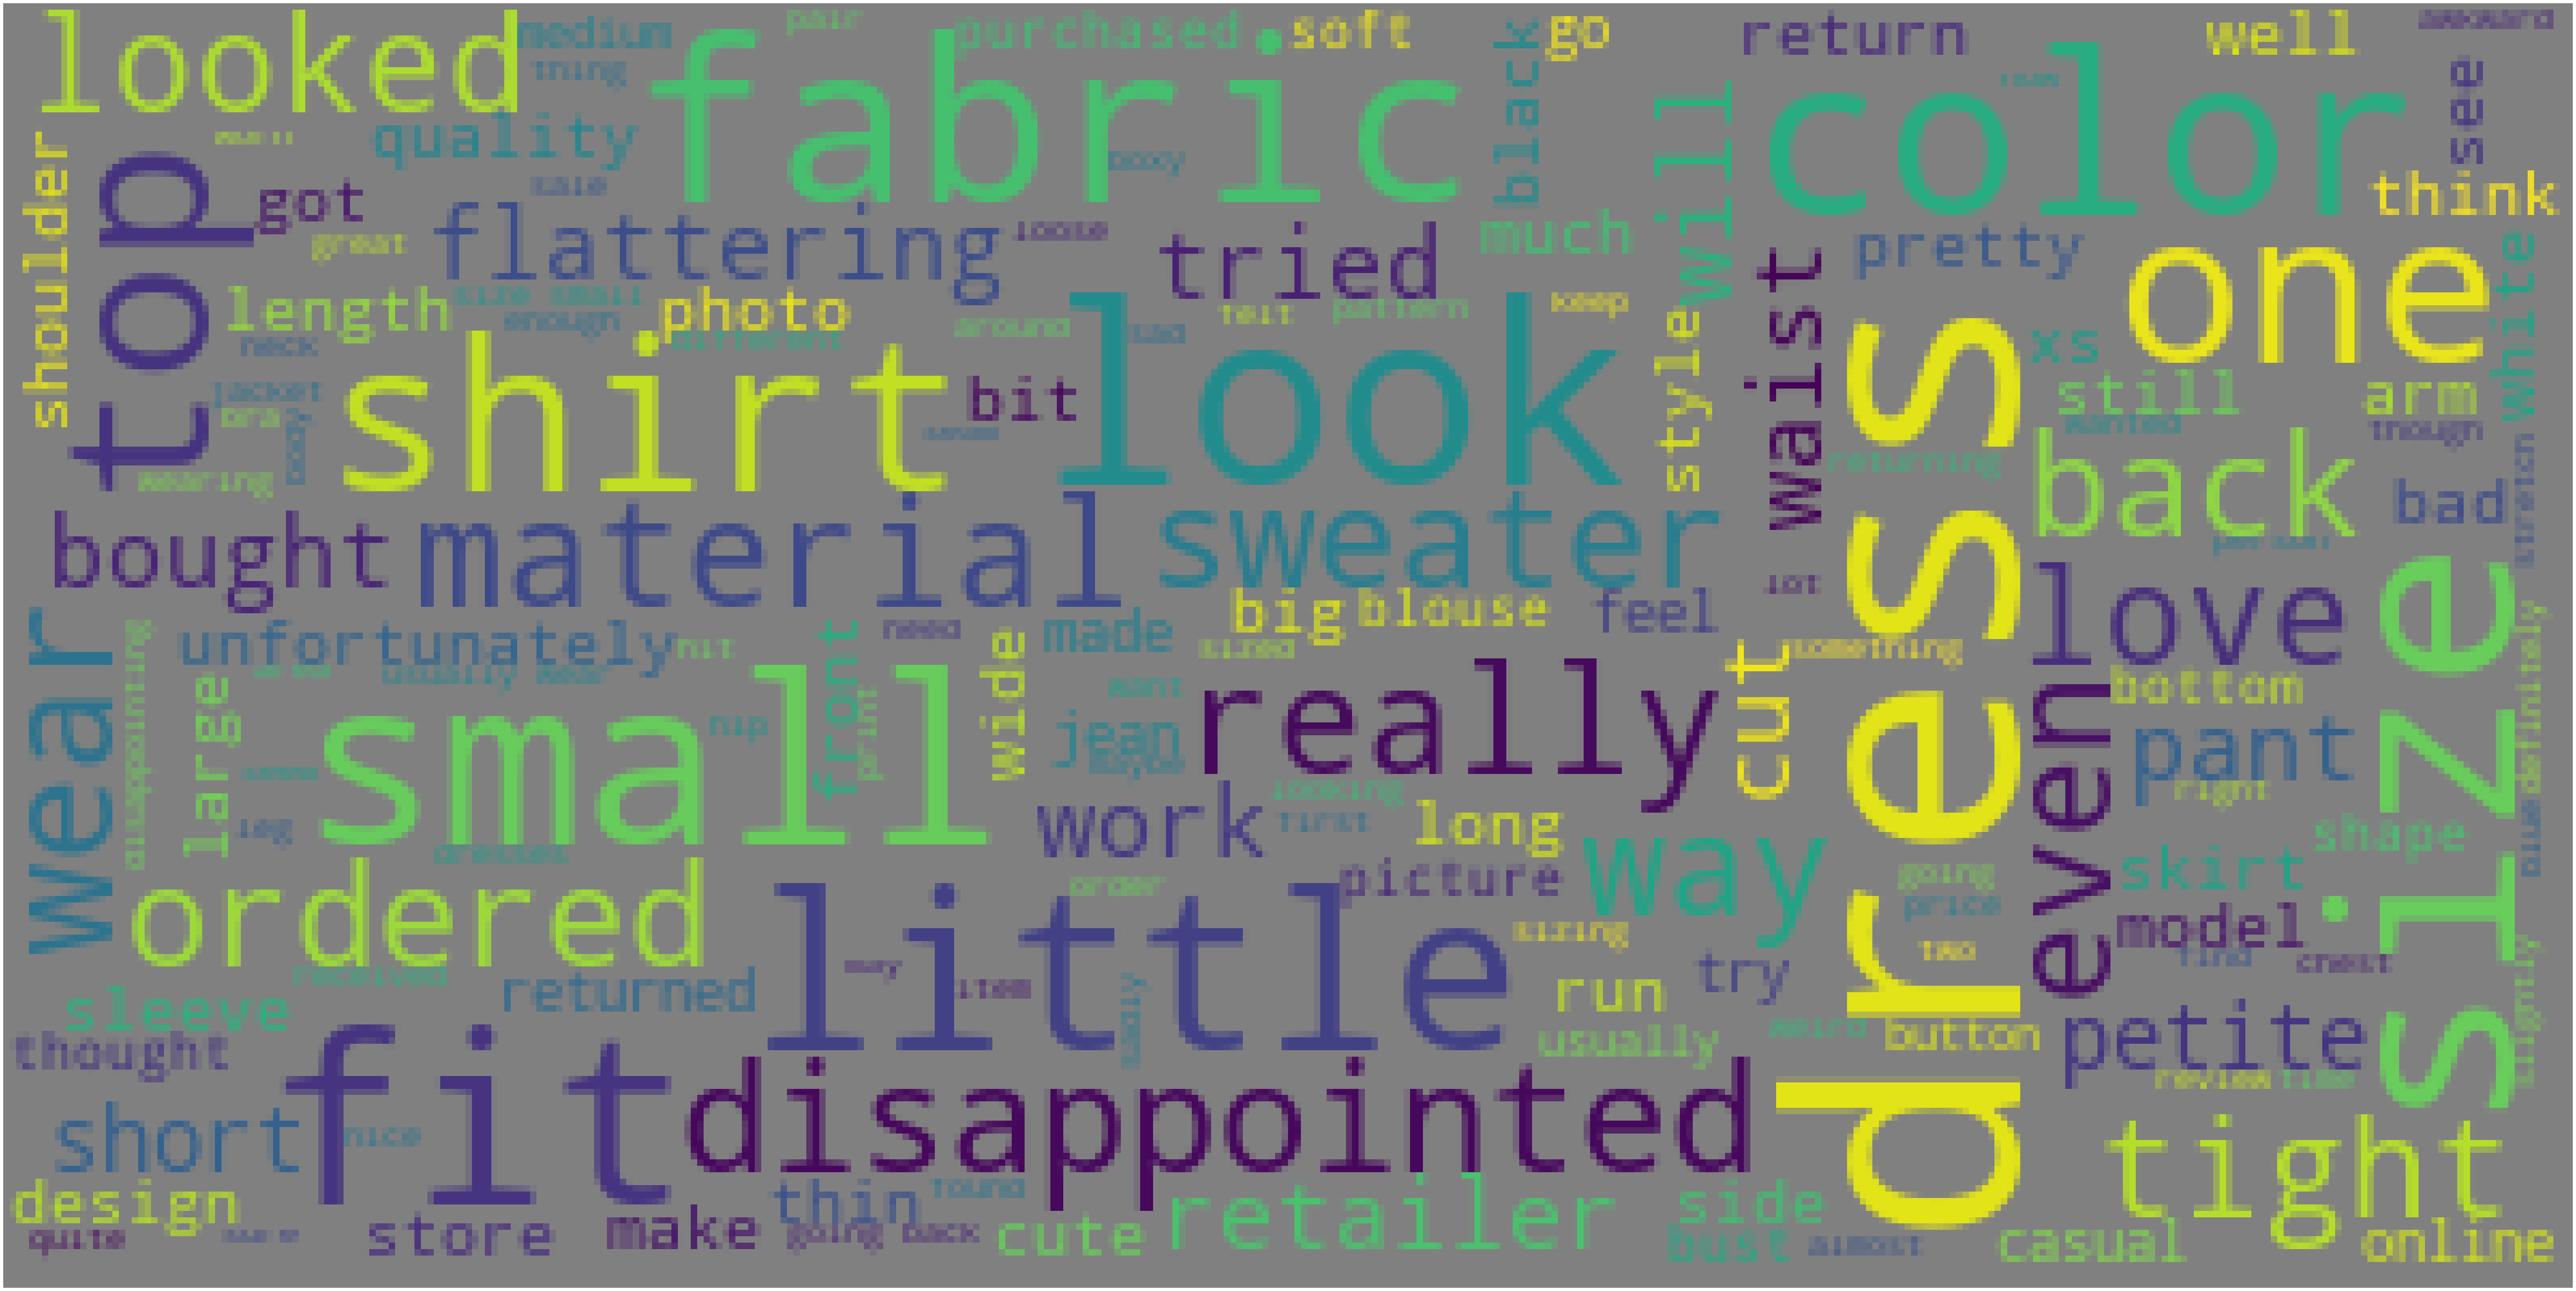

In [14]:
plt.figure(figsize = (100,100))
wc = WordCloud(background_color = "grey", max_words = 1000,  max_font_size = 50)
wc.generate(' '.join(negative_r["Review"]))
plt.imshow(wc)
plt.axis('off')

In [15]:
#preprocessing to avoid the error due to limited number of iterations possible
from sklearn import preprocessing

from sklearn.feature_extraction.text import CountVectorizer


from sklearn.model_selection import train_test_split

#Various models-::
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
nb_clf = MultinomialNB()

voting_clf = VotingClassifier(
 estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
 voting='hard'
 )

bag_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500,
 max_samples=100, bootstrap=True, n_jobs=-1
 )

In [16]:
import string
def text_process(review):
    nopunc=[word for word in review if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [17]:
df['Review Text'].head(5).apply(text_process)

0    [Absolutely, wonderful, silky, sexy, comfortable]
1    [Love, dress, sooo, pretty, happened, find, st...
2    [high, hopes, dress, really, wanted, work, ini...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flattering, due, adjustable, front, ti...
Name: Review Text, dtype: object

# creating new class

In [18]:
def creating_class(cols):
    rating=cols
    
    if rating <= 3:
        return 'BAD'
    else:
        return 'GOOD'
    

In [19]:
df=df.dropna(axis=0,how='any')

df['Rating']=df['Rating'].apply(creating_class)


In [20]:
rating_class = df[(df['Rating'] == "BAD") | (df['Rating'] == "GOOD")]
X_review=rating_class['Review Text']
y=rating_class['Rating']

In [21]:
#takes a lot of time
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_review)

In [22]:
print(len(bow_transformer.vocabulary_))

18746


In [23]:
#takes a lot of time
X_review = bow_transformer.transform(X_review)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.3, random_state=101)

In [25]:
# just for analysis I m considering Naive_Bayes
nb_clf.fit(X_train,y_train)


y_pred=nb_clf.predict(X_test)

print("Naive_bayes", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

Naive_bayes 0.8679437192744534
[[ 862  450]
 [ 329 4258]]


              precision    recall  f1-score   support

         BAD       0.72      0.66      0.69      1312
        GOOD       0.90      0.93      0.92      4587

    accuracy                           0.87      5899
   macro avg       0.81      0.79      0.80      5899
weighted avg       0.86      0.87      0.87      5899



In [26]:
rating_positive=df['Review Text'][101]
print(rating_positive)

rating_positive_transformed = bow_transformer.transform([rating_positive])
nb_clf.predict(rating_positive_transformed)[0]

I find that this brand can be a little bit all-over-the-place with sizes. had i tried this on in person i may have bought it in a small instead of a m. despite being a bit big it still looks great and hides my flaws well. i bought a m in another shirt from them (the seamed scoop neck) and that shirt was a full 2 inches smaller in the bust than this. just something to keep in mind. still a great shirt, love the neutral color.


'GOOD'

In [27]:
rating_negative=df['Review Text'][61]
rating_negative

rating_negative_transformed = bow_transformer.transform([rating_negative])
nb_clf.predict(rating_negative_transformed)[0]

'BAD'

In [28]:
df['Review Text'][2]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c'

# Comparison between various models

In [29]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf,bag_clf,nb_clf):
    try:
        clf.min_max_scaler.fit(X_train, y_train)
    except:
        clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print(classification_report(y_test, y_pred))

d:\python\envs\env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression 0.8682827597897949
[[ 856  456]
 [ 321 4266]]


              precision    recall  f1-score   support

         BAD       0.73      0.65      0.69      1312
        GOOD       0.90      0.93      0.92      4587

    accuracy                           0.87      5899
   macro avg       0.82      0.79      0.80      5899
weighted avg       0.86      0.87      0.87      5899

RandomForestClassifier 0.83726055263604
[[ 423  889]
 [  71 4516]]


              precision    recall  f1-score   support

         BAD       0.86      0.32      0.47      1312
        GOOD       0.84      0.98      0.90      4587

    accuracy                           0.84      5899
   macro avg       0.85      0.65      0.69      5899
weighted avg       0.84      0.84      0.81      5899

SVC 0.8776063739616884
[[ 770  542]
 [ 180 4407]]


              precision    recall  f1-score   support

         BAD       0.81      0.59      0.68      1312
        GOOD       0.89      0.96      0.92      

d:\python\envs\env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier 0.8752330903542973
[[ 732  580]
 [ 156 4431]]


              precision    recall  f1-score   support

         BAD       0.82      0.56      0.67      1312
        GOOD       0.88      0.97      0.92      4587

    accuracy                           0.88      5899
   macro avg       0.85      0.76      0.79      5899
weighted avg       0.87      0.88      0.87      5899

BaggingClassifier 0.7813188676046787
[[  25 1287]
 [   3 4584]]


              precision    recall  f1-score   support

         BAD       0.89      0.02      0.04      1312
        GOOD       0.78      1.00      0.88      4587

    accuracy                           0.78      5899
   macro avg       0.84      0.51      0.46      5899
weighted avg       0.81      0.78      0.69      5899

MultinomialNB 0.8679437192744534
[[ 862  450]
 [ 329 4258]]


              precision    recall  f1-score   support

         BAD       0.72      0.66      0.69      1312
        GOOD       0.90      0.93      0.92 